# Clustering

In [2]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance.  Why n_components = 50?
svd = TruncatedSVD(n_components = 50)

# Create a KMeans instance.  Knew to use n_clusters = 6.
kmeans = KMeans(n_clusters = 6)

# Create a pipeline
pipeline = make_pipeline(svd,kmeans)

In [3]:
import pandas as pd

wiki_untransposed = pd.read_csv('wikipedia-vectors.csv', index_col = 0)

print(wiki_untransposed.head())

   HTTP 404  Alexa Internet  Internet Explorer  HTTP cookie  Google Search  \
0       0.0        0.000000                0.0          0.0            0.0   
1       0.0        0.000000                0.0          0.0            0.0   
2       0.0        0.029607                0.0          0.0            0.0   
3       0.0        0.000000                0.0          0.0            0.0   
4       0.0        0.000000                0.0          0.0            0.0   

   Tumblr  Hypertext Transfer Protocol  Social search  Firefox  LinkedIn  \
0     0.0                          0.0            0.0      0.0       0.0   
1     0.0                          0.0            0.0      0.0       0.0   
2     0.0                          0.0            0.0      0.0       0.0   
3     0.0                          0.0            0.0      0.0       0.0   
4     0.0                          0.0            0.0      0.0       0.0   

      ...       Chad Kroeger  Nate Ruess  The Wanted  Stevie Nicks  \
0   

In [4]:
wiki = wiki_untransposed.transpose()

print(wiki.info())
print(wiki.head())

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, HTTP 404 to Adam Levine
Columns: 13125 entries, 0 to 13124
dtypes: float64(13125)
memory usage: 6.0+ MB
None
                   0      1         2      3      4      5      6      \
HTTP 404             0.0    0.0  0.000000    0.0    0.0    0.0    0.0   
Alexa Internet       0.0    0.0  0.029607    0.0    0.0    0.0    0.0   
Internet Explorer    0.0    0.0  0.000000    0.0    0.0    0.0    0.0   
HTTP cookie          0.0    0.0  0.000000    0.0    0.0    0.0    0.0   
Google Search        0.0    0.0  0.000000    0.0    0.0    0.0    0.0   

                      7      8      9      ...    13115  13116  13117  13118  \
HTTP 404           0.000000    0.0    0.0  ...      0.0    0.0    0.0    0.0   
Alexa Internet     0.000000    0.0    0.0  ...      0.0    0.0    0.0    0.0   
Internet Explorer  0.003772    0.0    0.0  ...      0.0    0.0    0.0    0.0   
HTTP cookie        0.000000    0.0    0.0  ...      0.0    0.0    0.0    0.

In [5]:
import scipy

wiki_csr = scipy.sparse.csr_matrix(wiki.values)

print(type(wiki_csr))
print(wiki_csr.toarray())

<class 'scipy.sparse.csr.csr_matrix'>
[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.02960744 ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.01159441  0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.00610985  0.         ...,  0.          0.00547551  0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]


In [6]:
titles = wiki.index.tolist()

print(titles)

['HTTP 404', 'Alexa Internet', 'Internet Explorer', 'HTTP cookie', 'Google Search', 'Tumblr', 'Hypertext Transfer Protocol', 'Social search', 'Firefox', 'LinkedIn', 'Global warming', 'Nationally Appropriate Mitigation Action', 'Nigel Lawson', 'Connie Hedegaard', 'Climate change', 'Kyoto Protocol', '350.org', 'Greenhouse gas emissions by the United States', '2010 United Nations Climate Change Conference', '2007 United Nations Climate Change Conference', 'Angelina Jolie', 'Michael Fassbender', 'Denzel Washington', 'Catherine Zeta-Jones', 'Jessica Biel', 'Russell Crowe', 'Mila Kunis', 'Dakota Fanning', 'Anne Hathaway', 'Jennifer Aniston', 'France national football team', 'Cristiano Ronaldo', 'Arsenal F.C.', 'Radamel Falcao', 'Zlatan Ibrahimović', 'Colombia national football team', '2014 FIFA World Cup qualification', 'Football', 'Neymar', 'Franck Ribéry', 'Tonsillitis', 'Hepatitis B', 'Doxycycline', 'Leukemia', 'Gout', 'Hepatitis C', 'Prednisone', 'Fever', 'Gabapentin', 'Lymphoma', 'Chad 

In [7]:
# Fit the pipeline to articles
pipeline.fit(wiki_csr)

# Calculate the cluster labels
labels = pipeline.predict(wiki_csr)

# Create a DataFrame aligning labels and titles
clusters = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(clusters.sort_values('label'))

                                          article  label
40                                    Tonsillitis      0
48                                     Gabapentin      0
47                                          Fever      0
46                                     Prednisone      0
45                                    Hepatitis C      0
44                                           Gout      0
43                                       Leukemia      0
42                                    Doxycycline      0
41                                    Hepatitis B      0
49                                       Lymphoma      0
39                                  Franck Ribéry      1
31                              Cristiano Ronaldo      1
32                                   Arsenal F.C.      1
33                                 Radamel Falcao      1
34                             Zlatan Ibrahimović      1
35                Colombia national football team      1
36              2014 FIFA World

# NMF

In [14]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance.  n_components = n_clusters = number of topics.
model = NMF(n_components = 6)

# Fit the model to articles
nmf_features = model.fit_transform(wiki_csr)

non_norm_df = pd.DataFrame(nmf_features,index = titles)
print(non_norm_df.head())

                          0    1    2    3    4         5
HTTP 404           0.000000  0.0  0.0  0.0  0.0  0.440461
Alexa Internet     0.000000  0.0  0.0  0.0  0.0  0.566607
Internet Explorer  0.003821  0.0  0.0  0.0  0.0  0.398641
HTTP cookie        0.000000  0.0  0.0  0.0  0.0  0.381734
Google Search      0.000000  0.0  0.0  0.0  0.0  0.485525


In [15]:
# Must normalize the vectors/rows in the (reduced) 6-dimensional space
from sklearn.preprocessing import normalize

# Normalize the NMF features
norm_features = normalize(nmf_features)

# Create a DataFrame
df = pd.DataFrame(norm_features,index = titles)
print(df.head())

# Select the row corresponding to 'Cristiano Ronaldo'
ronaldo = df.loc['Cristiano Ronaldo']

# Compute the dot products
similarities = df.dot(ronaldo)

# Display those with the largest cosine similarity
print(similarities.nlargest(11))

                          0    1    2    3    4         5
HTTP 404           0.000000  0.0  0.0  0.0  0.0  1.000000
Alexa Internet     0.000000  0.0  0.0  0.0  0.0  1.000000
Internet Explorer  0.009585  0.0  0.0  0.0  0.0  0.999954
HTTP cookie        0.000000  0.0  0.0  0.0  0.0  1.000000
Google Search      0.000000  0.0  0.0  0.0  0.0  1.000000
Cristiano Ronaldo                    1.000000
Franck Ribéry                        0.999972
Radamel Falcao                       0.999942
Zlatan Ibrahimović                   0.999942
France national football team        0.999923
Colombia national football team      0.999897
Neymar                               0.999022
2014 FIFA World Cup qualification    0.998443
Arsenal F.C.                         0.997741
Football                             0.974936
Russell Crowe                        0.223845
dtype: float64


In [18]:
import matplotlib.pyplot as plt

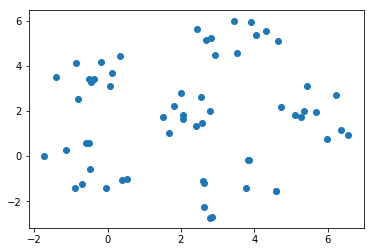

In [20]:
# Reduction from 13,125 words to 2D plot
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance
model = TSNE(learning_rate = 50)

# Apply fit_transform
tsne_features = model.fit_transform(wiki.values)

# Select the 0th feature
xs = tsne_features[:,0]

# Select the 1st feature
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys)
plt.show()

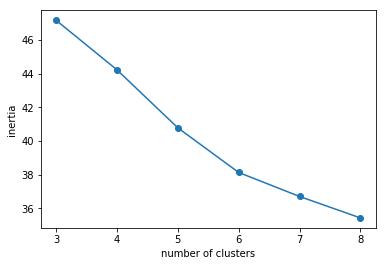

In [21]:
ks = range(3, 9)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(wiki.values)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()